In [140]:
import time
import sys
import numpy as np

### i. Revision

#### A. Speed and Memory Comparison

1. Speed

In [141]:
# Python list operations
a = [i for i in range(10000000)] # 10 million elements array
b = [i for i in range(10000000, 20000000)]

In [142]:
st = time.time()

c = []
for i in range(len(a)):
  c.append(a[i]+b[i])
print(time.time()-st, "sec")

2.227529764175415 sec


In [143]:
a = np.arange(10000000)
b = np.arange(10000000, 20000000)

st = time.time()
c = a+b
print(time.time()-st, "sec")

0.04332685470581055 sec


In [144]:
str(int(2.0163767337799072/0.032171010971069336)) + "X faster"

'62X faster'

- NumPy is faster than Python lists because it uses contiguous memory, fixed data types, and C-based vectorized operations. Python lists are slower due to dynamic typing and referential (pointer) overhead.

2. Memory

The `sys.getsizeof()` function in Python is used to get the size `(in bytes)` of a Python object in memory


In [145]:
a = [i for i in range(10000000)]

sys.getsizeof(a)

89095160

In [146]:
a = np.arange(10000000) #default dtype is np.int64

sys.getsizeof(a)

80000112

In [147]:
b = np.arange(10000000, dtype = np.int32)  #Memory is halved when converting from int64 to int32

sys.getsizeof(b)

40000112

In [148]:
c = np.arange(10000000, dtype = np.int8)  #Memory is one-eighth when converting from int64 to int32

sys.getsizeof(c)

10000112

- Using `np.int8` with large values causes overflow due to its limited range (-128 to 127). Internally, values wrap around using modulo 256 logic.

<br>


---
---

Remarks

---
---
- `int64` is often the native integer type, so operations may be slightly faster than with `int32`
- Some libraries (like TensorFlow, PyTorch) may expect a specific dtype. Changing to int32 might cause:
  - Type mismatch errors
  - Unexpected behavior during computations



<br>

---
---

When to Avoid ?

---
---
- If data might exceed the int32, int16 or int8 range.
- If precision and overflow are critical issues


---


#### B. Indexing

In [149]:
a = np.arange(12).reshape(4, 3)

a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

1. Normal Indexing

---

In [150]:
a[1,2]

np.int64(5)

In [151]:
a[1:3, 1:3]

array([[4, 5],
       [7, 8]])

2. Fancy Indexing

---

How to fetch first, third and fourth.

- When there is no pattern.
- Give a list, to index.

In [152]:
a[[0, 2, 3]]

array([[ 0,  1,  2],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [153]:
b = np.arange(24).reshape(6, 4)
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [154]:
b[[1,4,5]]

array([[ 4,  5,  6,  7],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [155]:
b[:, [1, 2]]

array([[ 1,  2],
       [ 5,  6],
       [ 9, 10],
       [13, 14],
       [17, 18],
       [21, 22]])

3. Boolean Indexing

---

In [156]:
d = np.random.randint(10, 100, 24).reshape(6, 4)

In [157]:
d > 50

array([[False, False,  True, False],
       [False,  True,  True, False],
       [ True, False, False, False],
       [False, False,  True,  True],
       [False, False,  True,  True],
       [False, False, False,  True]])

In [158]:
d[d > 50]

array([52, 88, 52, 96, 97, 56, 58, 75, 66])

In [159]:
d % 2 == 0

array([[ True,  True,  True,  True],
       [ True,  True,  True, False],
       [ True, False, False, False],
       [False,  True, False,  True],
       [False,  True,  True, False],
       [False,  True, False,  True]])

In [160]:
d[d % 2 == 0]

array([24, 44, 52, 18, 44, 88, 52, 96, 26, 56, 16, 58, 42, 66])

In [161]:
d[(d > 50) & (d % 2 == 0)]

array([52, 88, 52, 96, 56, 58, 66])

In [162]:
d[(d > 50) and (d % 2 == 0)]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

This is because the and operator cannot be used for **element-wise** comparison of boolean arrays in NumPy. You should use the bitwise `AND` operator `&` instead

#### C. BroadCasting


- Broadcasting lets NumPy work with arrays of different sizes during arithmetic operations.

- It automatically expands smaller arrays to match bigger ones.

- It does this without making extra copies of data.

In [163]:
a = np.arange(6).reshape(2, 3)
b = np.arange(6).reshape(2, 3)

print(a, "\n")
print(b, "\n")
print(a+b, "\n")

[[0 1 2]
 [3 4 5]] 

[[0 1 2]
 [3 4 5]] 

[[ 0  2  4]
 [ 6  8 10]] 



In [164]:
c = np.arange(6).reshape(2, 3)
d = np.arange(3).reshape(1, 3) # shape is changed

print(c, "\n")
print(c, "\n")
print(c+d, "\n")

[[0 1 2]
 [3 4 5]] 

[[0 1 2]
 [3 4 5]] 

[[0 2 4]
 [3 5 7]] 



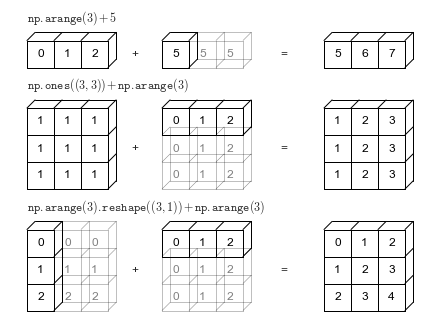

$\textbf{Broadcasting Rules}$

---

1. Compare shapes right to left.

```
Make Two array have same number of dimension.
---------------------------------------------
- If the number of dimension of two arrays are different, add new dimesion to the head of array with the smaller dimesions.

(4, 3) and 3,

(4, 3) and (1, 3)
```

2. Dimensions are compatible if:

  - They are equal, or
  - One of them is 1.


3. Missing dimensions are treated as 1.

4. If all dimensions are compatible, NumPy broadcasts the arrays.

5. Otherwise, you get a ValueError.

Examples

---

In [165]:
a = np.arange(12).reshape(4, 3)
b = np.arange(3)

print(a, "\n")
print(b, "\n")
print(a+b, "\n")

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]] 

[0 1 2] 

[[ 0  2  4]
 [ 3  5  7]
 [ 6  8 10]
 [ 9 11 13]] 



In [166]:
a = np.arange(12).reshape(3, 4)
b = np.arange(3)

print(a, "\n")
print(b, "\n")
print(a+b, "\n")

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] 

[0 1 2] 



ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

```
(3, 4) and (3, )
           (1, 3)
       ->  (3, 3)

```

In [167]:
a = np.arange(3).reshape(1, 3)
b = np.arange(4).reshape(4, 1)

print(a, "\n")
print(b, "\n")
print(a+b, "\n")

[[0 1 2]] 

[[0]
 [1]
 [2]
 [3]] 

[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]] 



In [168]:
a = np.arange(12).reshape(4, 3)
b = np.arange(12).reshape(3, 4)

print(a, "\n")
print(b, "\n")
print(a+b, "\n")

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]] 

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] 



ValueError: operands could not be broadcast together with shapes (4,3) (3,4) 

In [169]:
a = np.arange(16).reshape(4, 4)
b = np.arange(4).reshape(2, 2)

print(a, "\n")
print(b, "\n")
print(a+b, "\n")

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]] 

[[0 1]
 [2 3]] 



ValueError: operands could not be broadcast together with shapes (4,4) (2,2) 

## ii. Mathematical Functions




#### A. Builtin Mathematical Functions


In [170]:
x = np.arange(5)

1. sum

In [171]:
np.sum(x)

np.int64(10)

2. cumsum

In [172]:
np.cumsum(x)

array([ 0,  1,  3,  6, 10])

3. sin

In [173]:
np.sin(x)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ])

#### B. Custom Mathematical Functions

1. Sigmoid Function

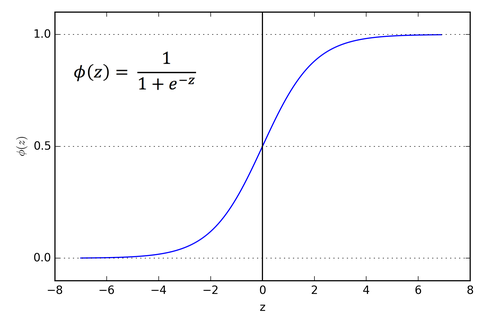

In [174]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [175]:
x = np.arange(30)

print(x, "\n")
print(sigmoid(x))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29] 

[0.5        0.73105858 0.88079708 0.95257413 0.98201379 0.99330715
 0.99752738 0.99908895 0.99966465 0.99987661 0.9999546  0.9999833
 0.99999386 0.99999774 0.99999917 0.99999969 0.99999989 0.99999996
 0.99999998 0.99999999 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


2. Mean Square Error

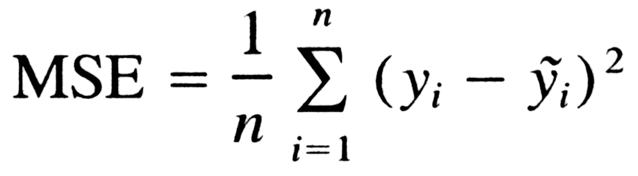

In [176]:
def mse(y, y_hat):
  return np.mean(y-y_hat)**2

In [177]:
y = np.random.random(10)*100
y_hat = np.random.random(10)*100

print(y, "\n")
print(y_hat, "\n")
print("MSE: ", mse(y, y_hat))

[94.61181369 52.91014643 24.56726257 86.15422386 96.04996494 83.19649637
 27.08616559 86.01364908 60.33219553 62.28824496] 

[78.87610381 45.57494939 28.13491463 54.44934362 50.69177743 93.42456603
 75.20553913  6.74558078 96.01496564 30.35772369] 

MSE:  129.3558173095077


3. Categorical Cross Entropy

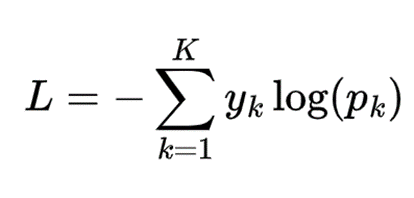

In [178]:
def cce(y, p):
  EPS = 1e-15
  p = np.clip(p, EPS, 1-EPS)

  return -np.sum(y * np.log(p))

In [179]:
y = np.random.random(10)
p = np.random.random(10)

print(y, "\n")
print(p, "\n")
print("CCE: ", mse(y, p))

[0.34954995 0.29953568 0.70744504 0.82393728 0.18422873 0.06336815
 0.51717577 0.6034341  0.28839036 0.52160147] 

[0.44099197 0.06956446 0.60616998 0.97238544 0.80857647 0.65639276
 0.98291014 0.87251085 0.27905909 0.47021525] 

CCE:  0.032403956119136205


## iii. Missing Values ~ (imp)

In [180]:
a = np.array([1, 2, 3, np.nan, 5])

a

array([ 1.,  2.,  3., nan,  5.])

In [181]:
np.isnan(a)

array([False, False, False,  True, False])

In [182]:
a[np.isnan(a)]

array([nan])

In [183]:
a[~np.isnan(a)]

array([1., 2., 3., 5.])

## iii. Numpy Utility Functions

#### 1. np.sort

---


**Return a sorted copy of an array.**  [Documentation](https://numpy.org/doc/stable/reference/generated/numpy.sort.html)




```
numpy.sort(arr, axis=1, kind=None, order=None, *, stable=None)
```

<br>
**Features**

- **Ascending Order**: Default behavior of `np.sort()`, reverse = True doesn't exist.
- **Descending Order**: Use slicing like `np.sort(arr)[::-1]` to reverse the sorted result.

- When used on multi-dimensional arrays, it sorts along a specified axis. `By default, it sorts along the last axis (axis=-1)`, which means it sorts each row independently in a 2D array.  write detail


```
np.sort(arr, axis=0)  # Sort by column
np.sort(arr, axis=1)  # Sort by row
```

<br>

In [184]:
a = np.random.randint(1, 100, 15)
a

array([33, 53, 18, 68, 23, 45, 11, 92, 75, 12, 54, 44, 76, 92, 80])

In [185]:
np.sort(a, kind='mergesort')

array([11, 12, 18, 23, 33, 44, 45, 53, 54, 68, 75, 76, 80, 92, 92])

In [186]:
np.sort(a, kind='mergesort')[::-1] #reverse = True doesn't exist, so use slicing

array([92, 92, 80, 76, 75, 68, 54, 53, 45, 44, 33, 23, 18, 12, 11])

2D Array

In [187]:
b = np.random.randint(1, 100, 24).reshape(6, 4)
b

array([[37, 42, 22, 74],
       [15, 39, 57, 21],
       [70, 66, 86, 67],
       [19, 68, 29, 49],
       [86, 72, 25, 44],
       [29, 71,  1, 77]])

In [188]:
np.sort(b, axis=0) #### sort by coloumn, like it will take a col and sort it. then second, sort it and so on.

array([[15, 39,  1, 21],
       [19, 42, 22, 44],
       [29, 66, 25, 49],
       [37, 68, 29, 67],
       [70, 71, 57, 74],
       [86, 72, 86, 77]])

In [189]:
np.sort(b, axis=1) ### sorted by row, like it will take a row and sort it. then second row, sort it and so on.

array([[22, 37, 42, 74],
       [15, 21, 39, 57],
       [66, 67, 70, 86],
       [19, 29, 49, 68],
       [25, 44, 72, 86],
       [ 1, 29, 71, 77]])

#### 2. np.append

---

<br>

**Append values to the end of an array**  [Documentation](https://numpy.org/doc/stable/reference/generated/numpy.append.html)

```
numpy.append(arr, values, axis=None)

```

**Note 1:** These `values` are appended to a copy of `arr`. It must be of the correct shape (the same shape as arr, excluding axis)

**Note 2:**   `np.append()` is inefficient in loops due to repeated array copying.  

**Note 3:** If `axis` is not given, both arr and values are flattened before use.

**Note 4:**
- `axis=0` appends rows (vertical concatenation).
- `axis=1`*italicised text* appends columns (horizontal concatenation).


<br>

In [190]:
a

array([33, 53, 18, 68, 23, 45, 11, 92, 75, 12, 54, 44, 76, 92, 80])

In [191]:
np.append(a, 200)

array([ 33,  53,  18,  68,  23,  45,  11,  92,  75,  12,  54,  44,  76,
        92,  80, 200])

In [192]:
# Note3
arr1 = np.array([1, 2, 3])
arr2 = np.array([[4, 5, 6], [7, 8, 9]])

arr3 = np.append(arr1, arr2)

print(arr1, "\n")
print(arr2, "\n")
print(arr3, "\n") # since no axis is given, both arr1 and arr2 are flattened before append

[1 2 3] 

[[4 5 6]
 [7 8 9]] 

[1 2 3 4 5 6 7 8 9] 



In [193]:
# arr3 = np.append(np.expand_dims(arr1, axis=0), arr2, axis = 0) #m1
arr3 = np.append(arr1.reshape(1, -1), arr2, axis = 0) #m2


print(arr1, "\n")
print(arr2, "\n")
print(arr3, "\n") # since no axis is given, both arr1 and arr2 are flattened before append

[1 2 3] 

[[4 5 6]
 [7 8 9]] 

[[1 2 3]
 [4 5 6]
 [7 8 9]] 



2D

In [194]:
b

array([[37, 42, 22, 74],
       [15, 39, 57, 21],
       [70, 66, 86, 67],
       [19, 68, 29, 49],
       [86, 72, 25, 44],
       [29, 71,  1, 77]])

In [195]:
b.shape

(6, 4)

In [196]:
np.append(b, np.ones(6).reshape(6,1), axis = 1) # practice this more

array([[37., 42., 22., 74.,  1.],
       [15., 39., 57., 21.,  1.],
       [70., 66., 86., 67.,  1.],
       [19., 68., 29., 49.,  1.],
       [86., 72., 25., 44.,  1.],
       [29., 71.,  1., 77.,  1.]])

#### 3. np.concatenate
<br>

Join a sequence of arrays along an existing axis. [Documentation](https://numpy.org/devdocs/reference/generated/numpy.concatenate.html)


```
np.concatenate((a1, a2, ...), axis=0, out=None, dtype=None, casting="same_kind")
```

- The arrays must have the same shape, except in the dimension corresponding to axis.
- If axis is `None`, arrays are flattened before use. `Default is 0`


In [197]:
c = np.arange(6).reshape(2,3)
d = np.arange(6, 12).reshape(2,3)

print(c, "\n")
print(d, "\n")

[[0 1 2]
 [3 4 5]] 

[[ 6  7  8]
 [ 9 10 11]] 



In [198]:
np.concatenate((c,d), axis=0)

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [199]:
np.concatenate((c,d), axis=1)

array([[ 0,  1,  2,  6,  7,  8],
       [ 3,  4,  5,  9, 10, 11]])

In [200]:
np.concatenate((c,d), axis=None)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

#### 4. np.unique

<br>

Find the unique elements of an array.
[Documentation](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)
```
numpy.unique(ar, return_index=False, return_inverse=False, return_counts=False, axis=None, *, equal_nan=True, sorted=True)
```


- Returns the sorted unique elements of an array
-  If `axis=None`, ar will be flattened

<br>

In [201]:
e = np.array([1, 2, 2, 2, np.nan, 3, 3, np.nan, 4, 5, 5, 5])
e

array([ 1.,  2.,  2.,  2., nan,  3.,  3., nan,  4.,  5.,  5.,  5.])

In [202]:
np.unique(e)

array([ 1.,  2.,  3.,  4.,  5., nan])

In [203]:
np.unique(e, return_index = True, return_counts=True, equal_nan=False)

(array([ 1.,  2.,  3.,  4.,  5., nan, nan]),
 array([0, 1, 5, 8, 9, 4, 7]),
 array([1, 3, 2, 1, 3, 1, 1]))

In [204]:
np.unique(e).size

6

#### 5. np.expand_dims

<br>

- `expand_dims` adds an extra layer to the array, like turning a 1D list into a 2D list with one row or one column, depending on the axis. [Documentation](https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html)
-  it expands the shape of an array by inserting a new axis at the specified position. This is often used to prepare arrays for broadcasting or to match expected input shapes (e.g., for neural networks or image processing).

```
numpy.expand_dims(a, axis)
```

<br>

In [205]:
print("Original Shape: ", a.shape, "\n")

a

Original Shape:  (15,) 



array([33, 53, 18, 68, 23, 45, 11, 92, 75, 12, 54, 44, 76, 92, 80])

In [206]:
print("Shape: ", np.expand_dims(a, axis=0).shape, "\n")

np.expand_dims(a, axis=0) #adds dimension to head

Shape:  (1, 15) 



array([[33, 53, 18, 68, 23, 45, 11, 92, 75, 12, 54, 44, 76, 92, 80]])

In [207]:
print("Shape: ", np.expand_dims(a, axis=1).shape, "\n")

np.expand_dims(a, axis=1) #add dim to tail

Shape:  (15, 1) 



array([[33],
       [53],
       [18],
       [68],
       [23],
       [45],
       [11],
       [92],
       [75],
       [12],
       [54],
       [44],
       [76],
       [92],
       [80]])

2D

In [208]:
b

array([[37, 42, 22, 74],
       [15, 39, 57, 21],
       [70, 66, 86, 67],
       [19, 68, 29, 49],
       [86, 72, 25, 44],
       [29, 71,  1, 77]])

In [209]:
np.expand_dims(b, axis=0)

array([[[37, 42, 22, 74],
        [15, 39, 57, 21],
        [70, 66, 86, 67],
        [19, 68, 29, 49],
        [86, 72, 25, 44],
        [29, 71,  1, 77]]])

In [210]:
np.expand_dims(b, axis=1)

array([[[37, 42, 22, 74]],

       [[15, 39, 57, 21]],

       [[70, 66, 86, 67]],

       [[19, 68, 29, 49]],

       [[86, 72, 25, 44]],

       [[29, 71,  1, 77]]])

In [211]:
np.expand_dims(b, axis=2)

array([[[37],
        [42],
        [22],
        [74]],

       [[15],
        [39],
        [57],
        [21]],

       [[70],
        [66],
        [86],
        [67]],

       [[19],
        [68],
        [29],
        [49]],

       [[86],
        [72],
        [25],
        [44]],

       [[29],
        [71],
        [ 1],
        [77]]])

#### 6. np.where

<br>

Return the index or element of pf array depending on condition. [Documentation](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

```
numpy.where(condition, [x, y, ]/)
```

It returns elements chosen from two arrays `(x and y)` based on a condition array. If the condition is True at a given index, the element from x at that index is returned; otherwise, the element from y is returned.

<br>
Behavior:

---
- **With one argument (condition):** Returns the indices where the condition is True.

- **With three arguments (condition, x, y):** Returns elements from x where the condition is True, and from y where the condition is False.

<br>



In [212]:
a

array([33, 53, 18, 68, 23, 45, 11, 92, 75, 12, 54, 44, 76, 92, 80])

In [213]:
np.where(a>50)

(array([ 1,  3,  7,  8, 10, 12, 13, 14]),)

Returns the index position, since, x and y are not given.

In [214]:
np.where(a>50, 0, a)

array([33,  0, 18,  0, 23, 45, 11,  0,  0, 12,  0, 44,  0,  0,  0])

Return the element and not index array when x and y are given.

In [215]:
np.where(a%2==0, 0, a)

array([33, 53,  0,  0, 23, 45, 11,  0, 75,  0,  0,  0,  0,  0,  0])

#### 7. np.argmax

<br>

- Returns the indices of the maximum values along an axis. [Documentation](https://numpy.org/devdocs/reference/generated/numpy.argmax.html)

```
np.argmax(a, axis=None, out=None, *, keepdims=<no value>)
```
<br>
- When you reduce over an axis using axis=..., it usually removes that axis from the result.
But if you set `keepdims=True`, it keeps the reduced axis with size 1, so that the output shape is compatible (broadcastable) with the original array.

<br>

In [216]:
a

array([33, 53, 18, 68, 23, 45, 11, 92, 75, 12, 54, 44, 76, 92, 80])

In [217]:
np.argmax(a)

np.int64(7)

In [218]:
b

array([[37, 42, 22, 74],
       [15, 39, 57, 21],
       [70, 66, 86, 67],
       [19, 68, 29, 49],
       [86, 72, 25, 44],
       [29, 71,  1, 77]])

In [219]:
np.argmax(b, axis=0) # max index of col

array([4, 4, 2, 5])

In [220]:
np.argmax(b, axis=1)

array([3, 2, 2, 1, 0, 3])

use of keepdims

In [221]:
b.shape

(6, 4)

In [222]:
np.argmax(b, axis=0).shape #max along 0th dimension

(4,)

In [223]:
np.argmax(b, axis=0, keepdims=True).shape # max along 0th dimension but preserve it.

(1, 4)

#### 8. np.cumsum

Return the cumulative sum of the elements along a given axis. [Documentation](https://numpy.org/doc/2.1/reference/generated/numpy.cumsum.html)

```
numpy.cumsum(a, axis=None, dtype=None, out=None)[source]
```
or

```
numpy.cumulative_sum(a, /, *, axis=None, dtype=None, out=None, include_initial=False)

# `include_initial=True` will return array start from zero like [0, 1, 3, 6] for [1, 2, 3]
```
- Axis along which the cumulative sum is computed. The default (None) is to compute the cumsum over the flattened array.

- `cumsum(b)[-1]` may not be equal to `sum(b)` duse to precision of dtypes.

In [224]:
a

array([33, 53, 18, 68, 23, 45, 11, 92, 75, 12, 54, 44, 76, 92, 80])

In [225]:
np.sum(a)

np.int64(776)

In [226]:
np.cumsum(a)

array([ 33,  86, 104, 172, 195, 240, 251, 343, 418, 430, 484, 528, 604,
       696, 776])

In [227]:
b

array([[37, 42, 22, 74],
       [15, 39, 57, 21],
       [70, 66, 86, 67],
       [19, 68, 29, 49],
       [86, 72, 25, 44],
       [29, 71,  1, 77]])

In [228]:
np.cumsum(b, axis=0)

array([[ 37,  42,  22,  74],
       [ 52,  81,  79,  95],
       [122, 147, 165, 162],
       [141, 215, 194, 211],
       [227, 287, 219, 255],
       [256, 358, 220, 332]])

In [229]:
np.cumsum(b, axis =1)

array([[ 37,  79, 101, 175],
       [ 15,  54, 111, 132],
       [ 70, 136, 222, 289],
       [ 19,  87, 116, 165],
       [ 86, 158, 183, 227],
       [ 29, 100, 101, 178]])

In [230]:
c = np.arange(1, 6)

In [231]:
np.cumprod(c)

array([  1,   2,   6,  24, 120])

#### 9. np.percentile

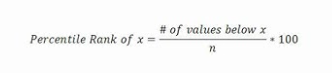

Compute the q-th percentile of the data along the specified axis and
Returns the q-th percentile(s) of the array elements. [Documentation](https://numpy.org/doc/2.1/reference/generated/numpy.percentile.html


)

```
np.percentile(a, q, axis=None, out=None, overwrite_input=False, method='linear', keepdims=False, *, weights=None)
```

- **axis: {int, tuple of int, None}, optional**
      Axis or axes along which the percentiles are computed.
      The default is to compute the percentile(s) along a flattened version of the array


In [232]:
a

array([33, 53, 18, 68, 23, 45, 11, 92, 75, 12, 54, 44, 76, 92, 80])

In [233]:
np.percentile(a, 100)

np.float64(92.0)

In [234]:
np.percentile(a, 0)

np.float64(11.0)

In [235]:
np.percentile(a, 50)

np.float64(53.0)

In [236]:
np.median(a)

np.float64(53.0)

10. np.histogram

In [237]:
a

array([33, 53, 18, 68, 23, 45, 11, 92, 75, 12, 54, 44, 76, 92, 80])

In [238]:
np.histogram(a, bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])

(array([0, 3, 1, 1, 2, 2, 1, 3]), array([ 0, 10, 20, 30, 40, 50, 60, 70, 80]))

#### 11. np.corrcoef

<br>

Return Pearson product-moment correlation coefficients [Documentation](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html)


```
np.corrcoef(x, y=None, rowvar=True, *, dtype=None)

```

Due to floating point rounding the resulting array may not be Hermitian, the diagonal elements may not be 1, and the elements may not satisfy the inequality abs(a) <= 1

<br>

In [239]:
a = np.random.random(10)

a

array([0.96790925, 0.69615952, 0.20624843, 0.53707145, 0.36259484,
       0.87686213, 0.83318628, 0.42958668, 0.32446373, 0.67720783])

In [240]:
b = np.random.randint(0, 10, 10)

b

array([3, 7, 9, 1, 3, 4, 3, 0, 4, 4])

In [241]:
np.corrcoef(a, b)

array([[ 1.        , -0.19576589],
       [-0.19576589,  1.        ]])

In [242]:
data = np.array([[1, 2, 3, 4, 5],     # variable 1
                 [5, 4, 3, 2, 1]])    # variable 2

np.corrcoef(data, rowvar=True)

array([[ 1., -1.],
       [-1.,  1.]])

12. np.isin

In [243]:
a = np.random.randint(0, 100, 20)

a

array([56, 86, 74, 19,  6, 92, 65, 13,  2, 54, 44, 69, 16, 54, 35,  0, 91,
       53, 43,  4])

In [244]:
item = [10, 20, 30, 40, 50, 60, 70, 80, 90]

np.isin(a, item)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [245]:
a[np.isin(a, item)]

array([], dtype=int64)

13. np.flip

In [246]:
a

array([56, 86, 74, 19,  6, 92, 65, 13,  2, 54, 44, 69, 16, 54, 35,  0, 91,
       53, 43,  4])

In [247]:
np.flip(a)

array([ 4, 43, 53, 91,  0, 35, 54, 16, 69, 44, 54,  2, 13, 65, 92,  6, 19,
       74, 86, 56])

In [248]:
b = np.arange(24).reshape(6, 4)
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [249]:
np.flip(b)

array([[23, 22, 21, 20],
       [19, 18, 17, 16],
       [15, 14, 13, 12],
       [11, 10,  9,  8],
       [ 7,  6,  5,  4],
       [ 3,  2,  1,  0]])

In [250]:
np.flip(b, axis=1)

array([[ 3,  2,  1,  0],
       [ 7,  6,  5,  4],
       [11, 10,  9,  8],
       [15, 14, 13, 12],
       [19, 18, 17, 16],
       [23, 22, 21, 20]])

In [251]:
np.flip(b, axis=0)

array([[20, 21, 22, 23],
       [16, 17, 18, 19],
       [12, 13, 14, 15],
       [ 8,  9, 10, 11],
       [ 4,  5,  6,  7],
       [ 0,  1,  2,  3]])

#### 14. np.put

<br>

Replaces specified elements of an array with given values. [Documentation](https://numpy.org/devdocs/reference/generated/numpy.put.html)

The indexing works on the flattened target array. put is roughly equivalent to:

$$\textbf{arr.flat[ind] = v}$$




```
np.put(arr, ind, value, mode='raise')
```
<br>

### `mode`:= (`'raise'`, `'wrap'`, `'clip'`)

```
np.put(a, [1, 5], [100, 200], mode='wrap')
```

<br>

| Mode     | Description                                               | Allows Negative Indices | Example Behavior           |
|----------|-----------------------------------------------------------|--------------------------|----------------------------|
| `'raise'` | Default mode. Raises `IndexError` on out-of-bounds access. |  Yes                   | `a[5]` →  Error           |
| `'wrap'`  | Wraps around using modular indexing (like a circular list). |  Yes                   | `a[5]` → `a[5 % len(a)]`   |
| `'clip'`  | Clips indices to the nearest valid range (0 to len-1).    |  No                    | `a[5]` → `a[len(a) - 1]`   |


<br>
<br>

In [252]:
a

array([56, 86, 74, 19,  6, 92, 65, 13,  2, 54, 44, 69, 16, 54, 35,  0, 91,
       53, 43,  4])

In [253]:
index = [0, 1]
value = [100, 200]

np.put(a, index, value) #permanent changes to array doesn't create a copy
a

array([100, 200,  74,  19,   6,  92,  65,  13,   2,  54,  44,  69,  16,
        54,  35,   0,  91,  53,  43,   4])

#### 15. np.delete


Return a new array with sub-arrays along an axis deleted. For a one dimensional array, this returns those entries not returned by arr[obj]. [Documentation](https://numpy.org/doc/stable/reference/generated/numpy.delete.html)

```
numpy.delete(arr, obj, axis=None)
```

`obj` := Indicate indices of sub-arrays to remove along the specified axis.




In [254]:
a

array([100, 200,  74,  19,   6,  92,  65,  13,   2,  54,  44,  69,  16,
        54,  35,   0,  91,  53,  43,   4])

In [255]:
np.delete(a, 0) # Create a copy and then delete

array([200,  74,  19,   6,  92,  65,  13,   2,  54,  44,  69,  16,  54,
        35,   0,  91,  53,  43,   4])

In [256]:
arr = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
arr

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [257]:
arr.shape

(3, 4)

In [258]:
np.delete(arr, 1, axis = 0)

array([[ 1,  2,  3,  4],
       [ 9, 10, 11, 12]])

In [259]:
np.delete(arr, 2, axis = 1)

array([[ 1,  2,  4],
       [ 5,  6,  8],
       [ 9, 10, 12]])

#### 16. Set Function

In [260]:
f = np.array([1, 2, 3, 4, 5])
g = np.array([4, 5, 6, 7, 8])

print(f)
print(g)

[1 2 3 4 5]
[4 5 6 7 8]


a. np.union1d

In [261]:
np.union1d(f, g)

array([1, 2, 3, 4, 5, 6, 7, 8])

b. np.intersect1d

In [262]:
np.intersect1d(f, g)

array([4, 5])

c. np.setdiff1d

In [263]:
np.setdiff1d(f, g)

array([1, 2, 3])

In [264]:
np.setdiff1d(g, f)

array([6, 7, 8])

d. np.setxor1d

In [265]:
np.setxor1d(f, g)

array([1, 2, 3, 6, 7, 8])

np.in1d

In [266]:
np.in1d(f, 1)

/tmp/ipython-input-266-1080518474.py:1: DeprecationWarning: `in1d` is deprecated. Use `np.isin` instead.
  np.in1d(f, 1)


array([ True, False, False, False, False])

In [267]:
np.in1d(f, 10)

/tmp/ipython-input-267-4240572035.py:1: DeprecationWarning: `in1d` is deprecated. Use `np.isin` instead.
  np.in1d(f, 10)


array([False, False, False, False, False])

In [268]:
np.isin(f, 1)

array([ True, False, False, False, False])

#### 17. np.clip

Clip (limit) the values in an array. [Documentation](https://numpy.org/devdocs/reference/generated/numpy.clip.html)

Given an interval, values outside the interval are clipped to the interval edges.

```
numpy.clip(a, a_min=<no value>, a_max=<no value>, out=None, *, min=<no value>, max=<no value>)
```

***a_min, a_max*** : *array_like or None*
- Minimum and maximum value limit. If None, clipping is not performed on the corresponding edge. If both a_min and a_max are None, the elements of the returned array stay the same

***min, max*** : *array_like or None*

- Array API compatible alternatives for a_min and a_max arguments. Either a_min and a_max or min and max can be passed at the same time

<br>

**Note:** When a_min is greater than a_max, clip returns an array in which all values are equal to a_max

<br>

In [269]:
a

array([100, 200,  74,  19,   6,  92,  65,  13,   2,  54,  44,  69,  16,
        54,  35,   0,  91,  53,  43,   4])

In [270]:
np.clip(a, a_min=25, a_max=75)

array([75, 75, 74, 25, 25, 75, 65, 25, 25, 54, 44, 69, 25, 54, 35, 25, 75,
       53, 43, 25])